In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
from sklearn.datasets import *

In [2]:
iris = load_iris(as_frame=True)
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
#df = iris.data
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [3]:
# Список колонок с типами данных
df.dtypes


sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

In [4]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

sepal length (cm) - 0
sepal width (cm) - 0
petal length (cm) - 0
petal width (cm) - 0
target - 0


In [5]:
# Основные статистические характеристки набора данных
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
# Enable inline plots
%matplotlib inline

# Задание стиля графиков
sns.set(style="ticks")

# Задание формата графиков для сохранения высокого качества PNG
from IPython.display import set_matplotlib_formats
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

In [7]:
pd.set_option("display.width", 70)

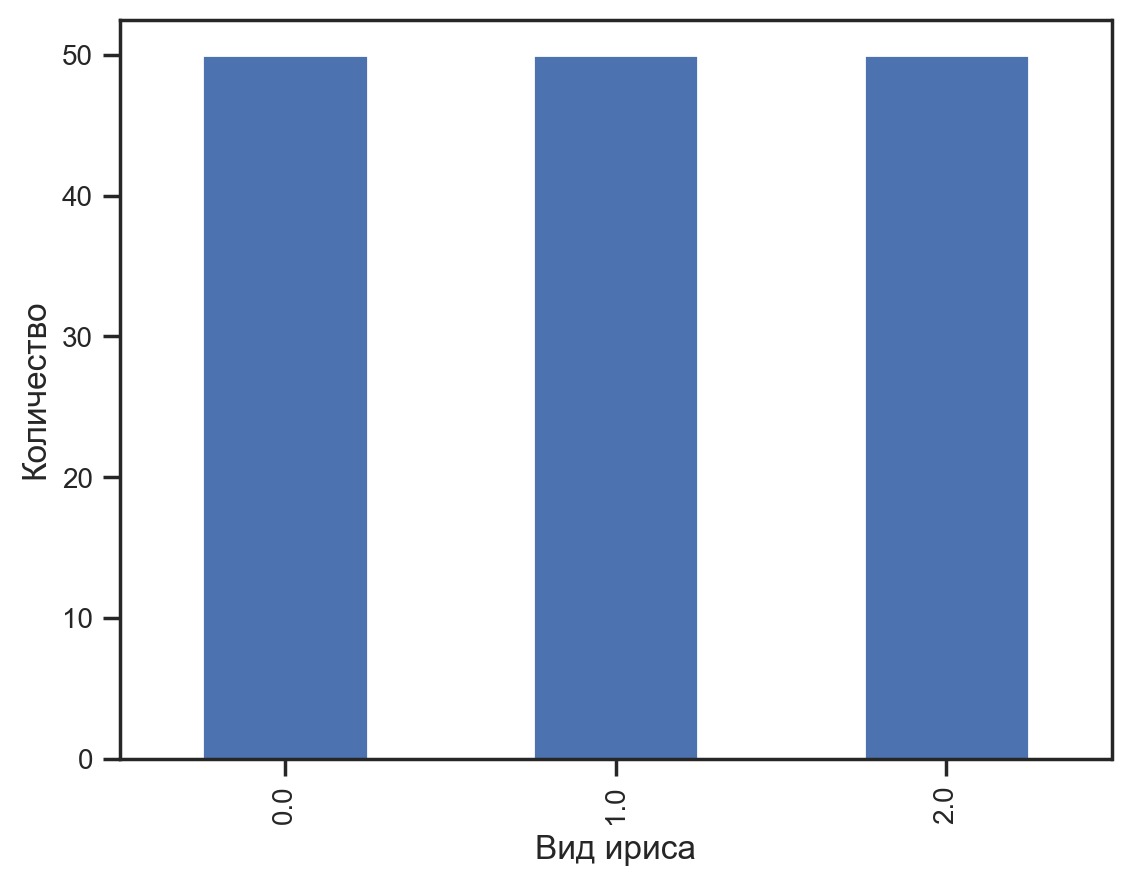

In [8]:
count_full = df.groupby("target")["target"].count().sort_values()
count_full.plot(x="Вид ириса", y="Количество", kind="bar", fontsize=10)
plt.xlabel("Вид ириса")
plt.ylabel("Количество")
plt.show()

<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

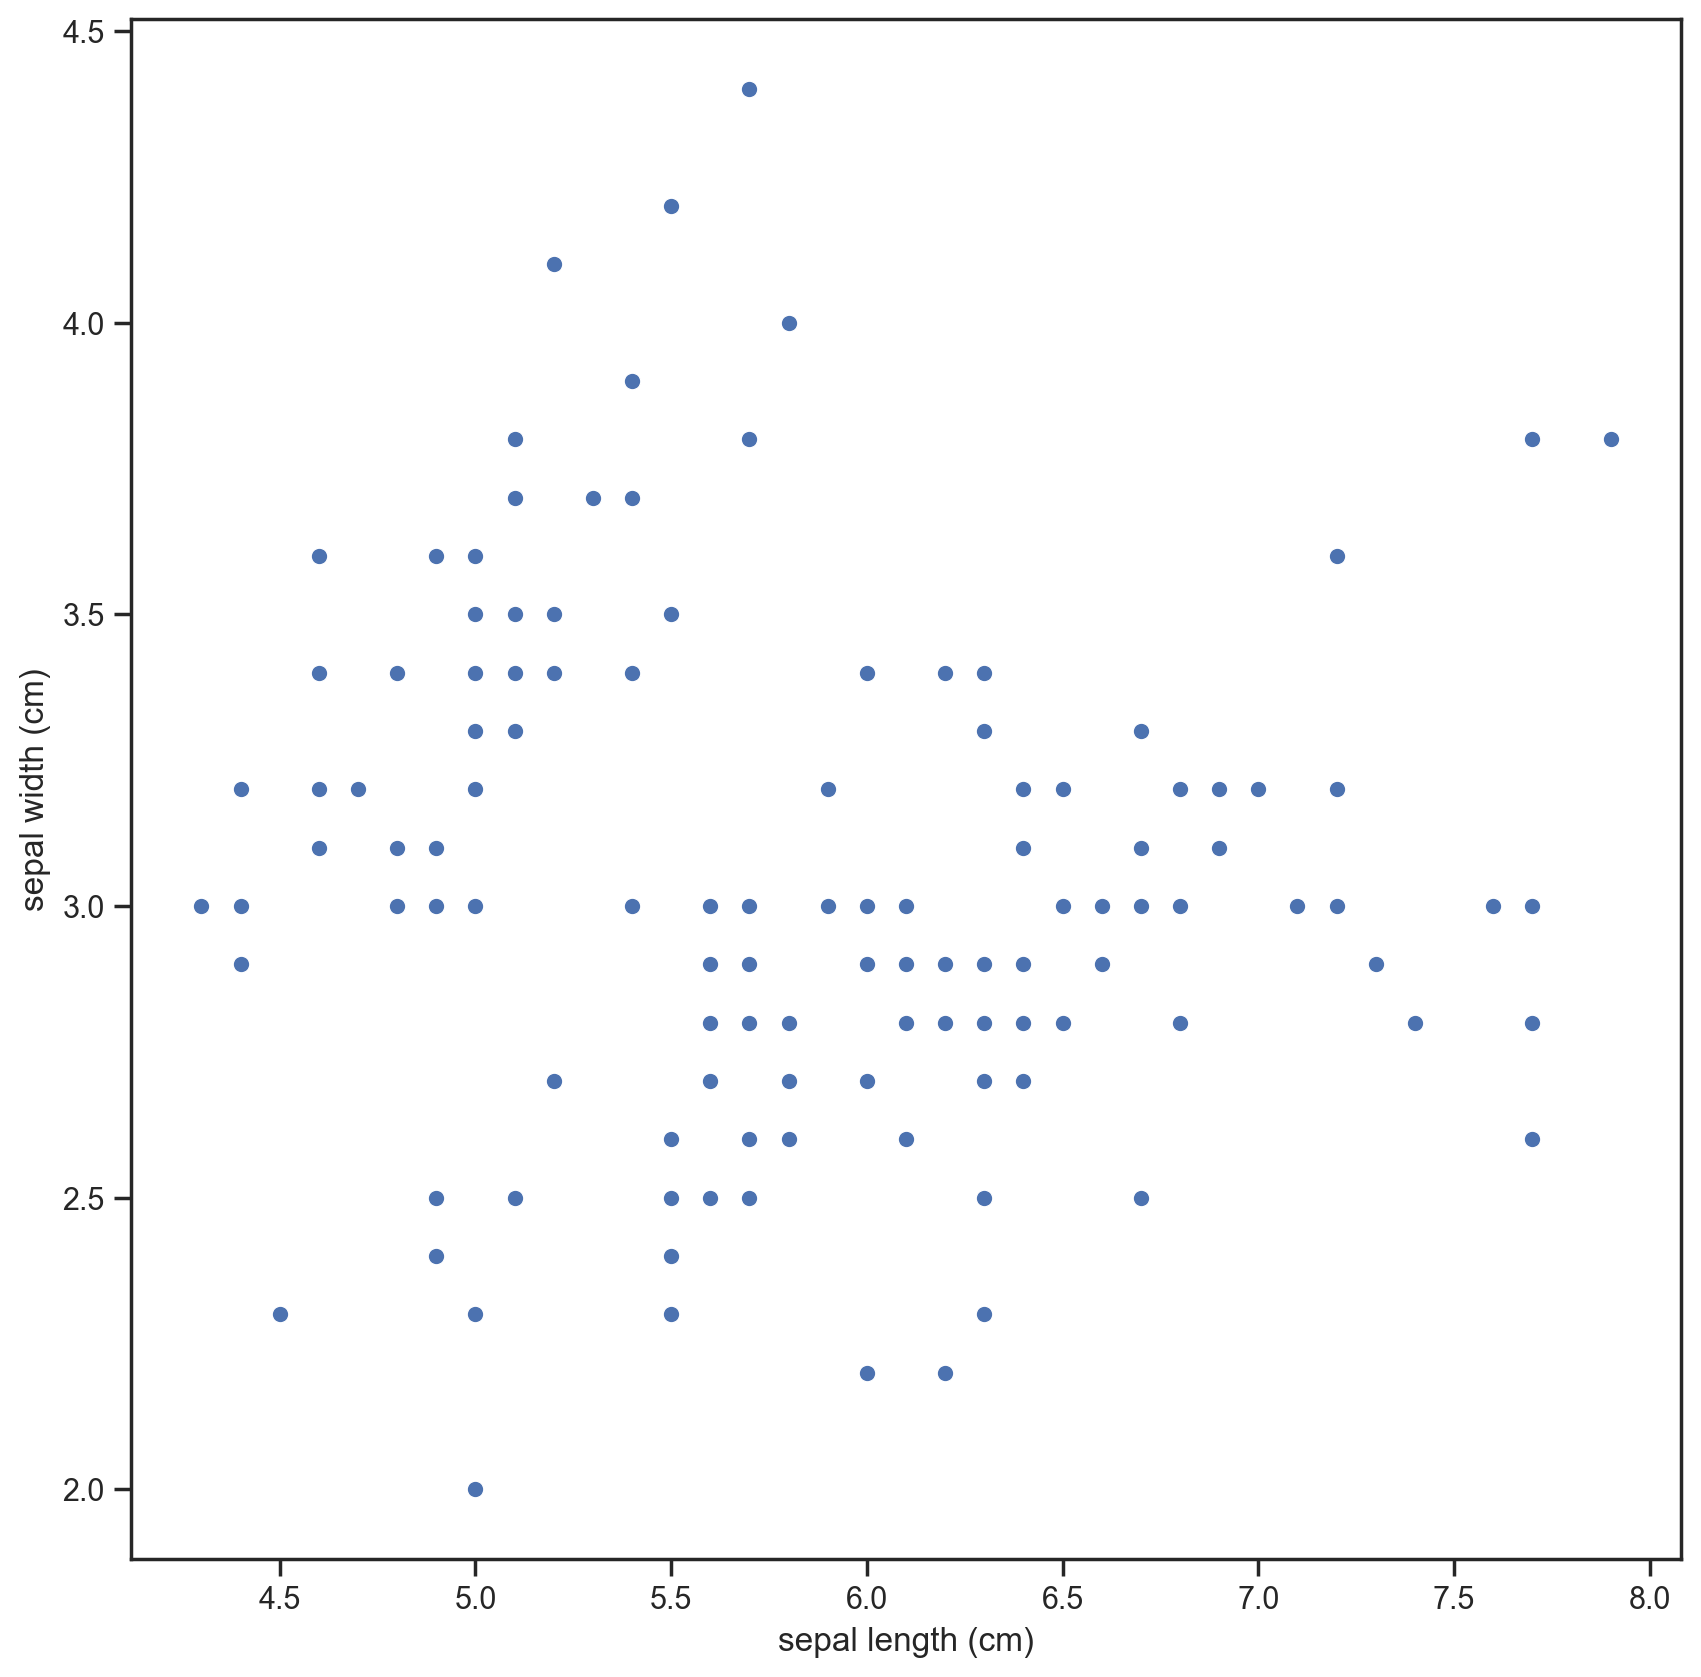

In [9]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='sepal length (cm)', y='sepal width (cm)', data=df)

<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

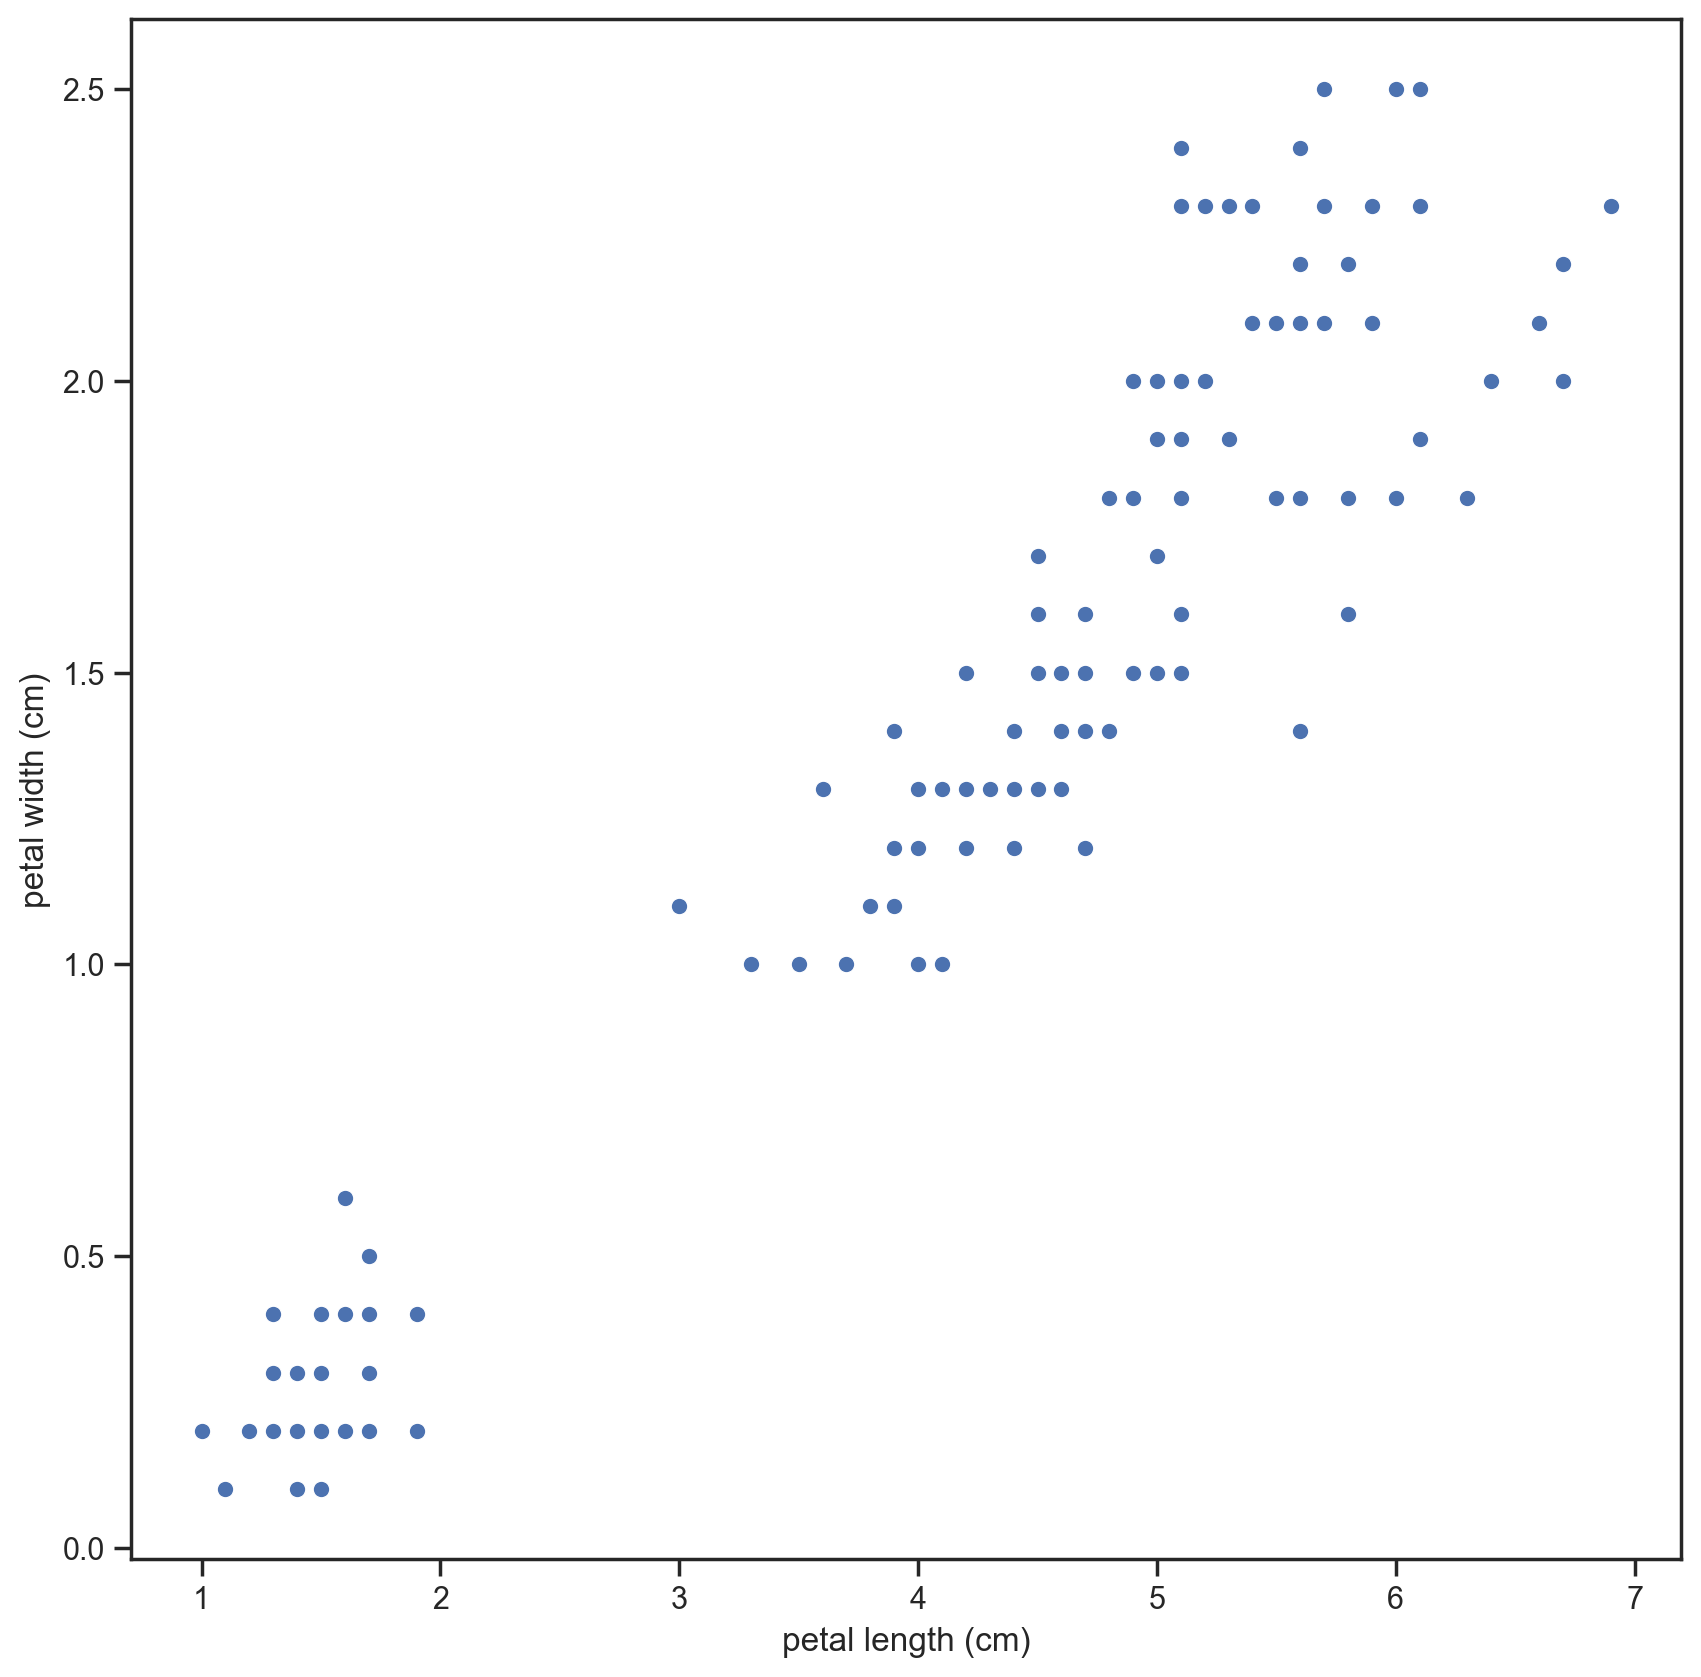

In [10]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='petal length (cm)', y='petal width (cm)', data=df)

<AxesSubplot: xlabel='sepal length (cm)', ylabel='Count'>

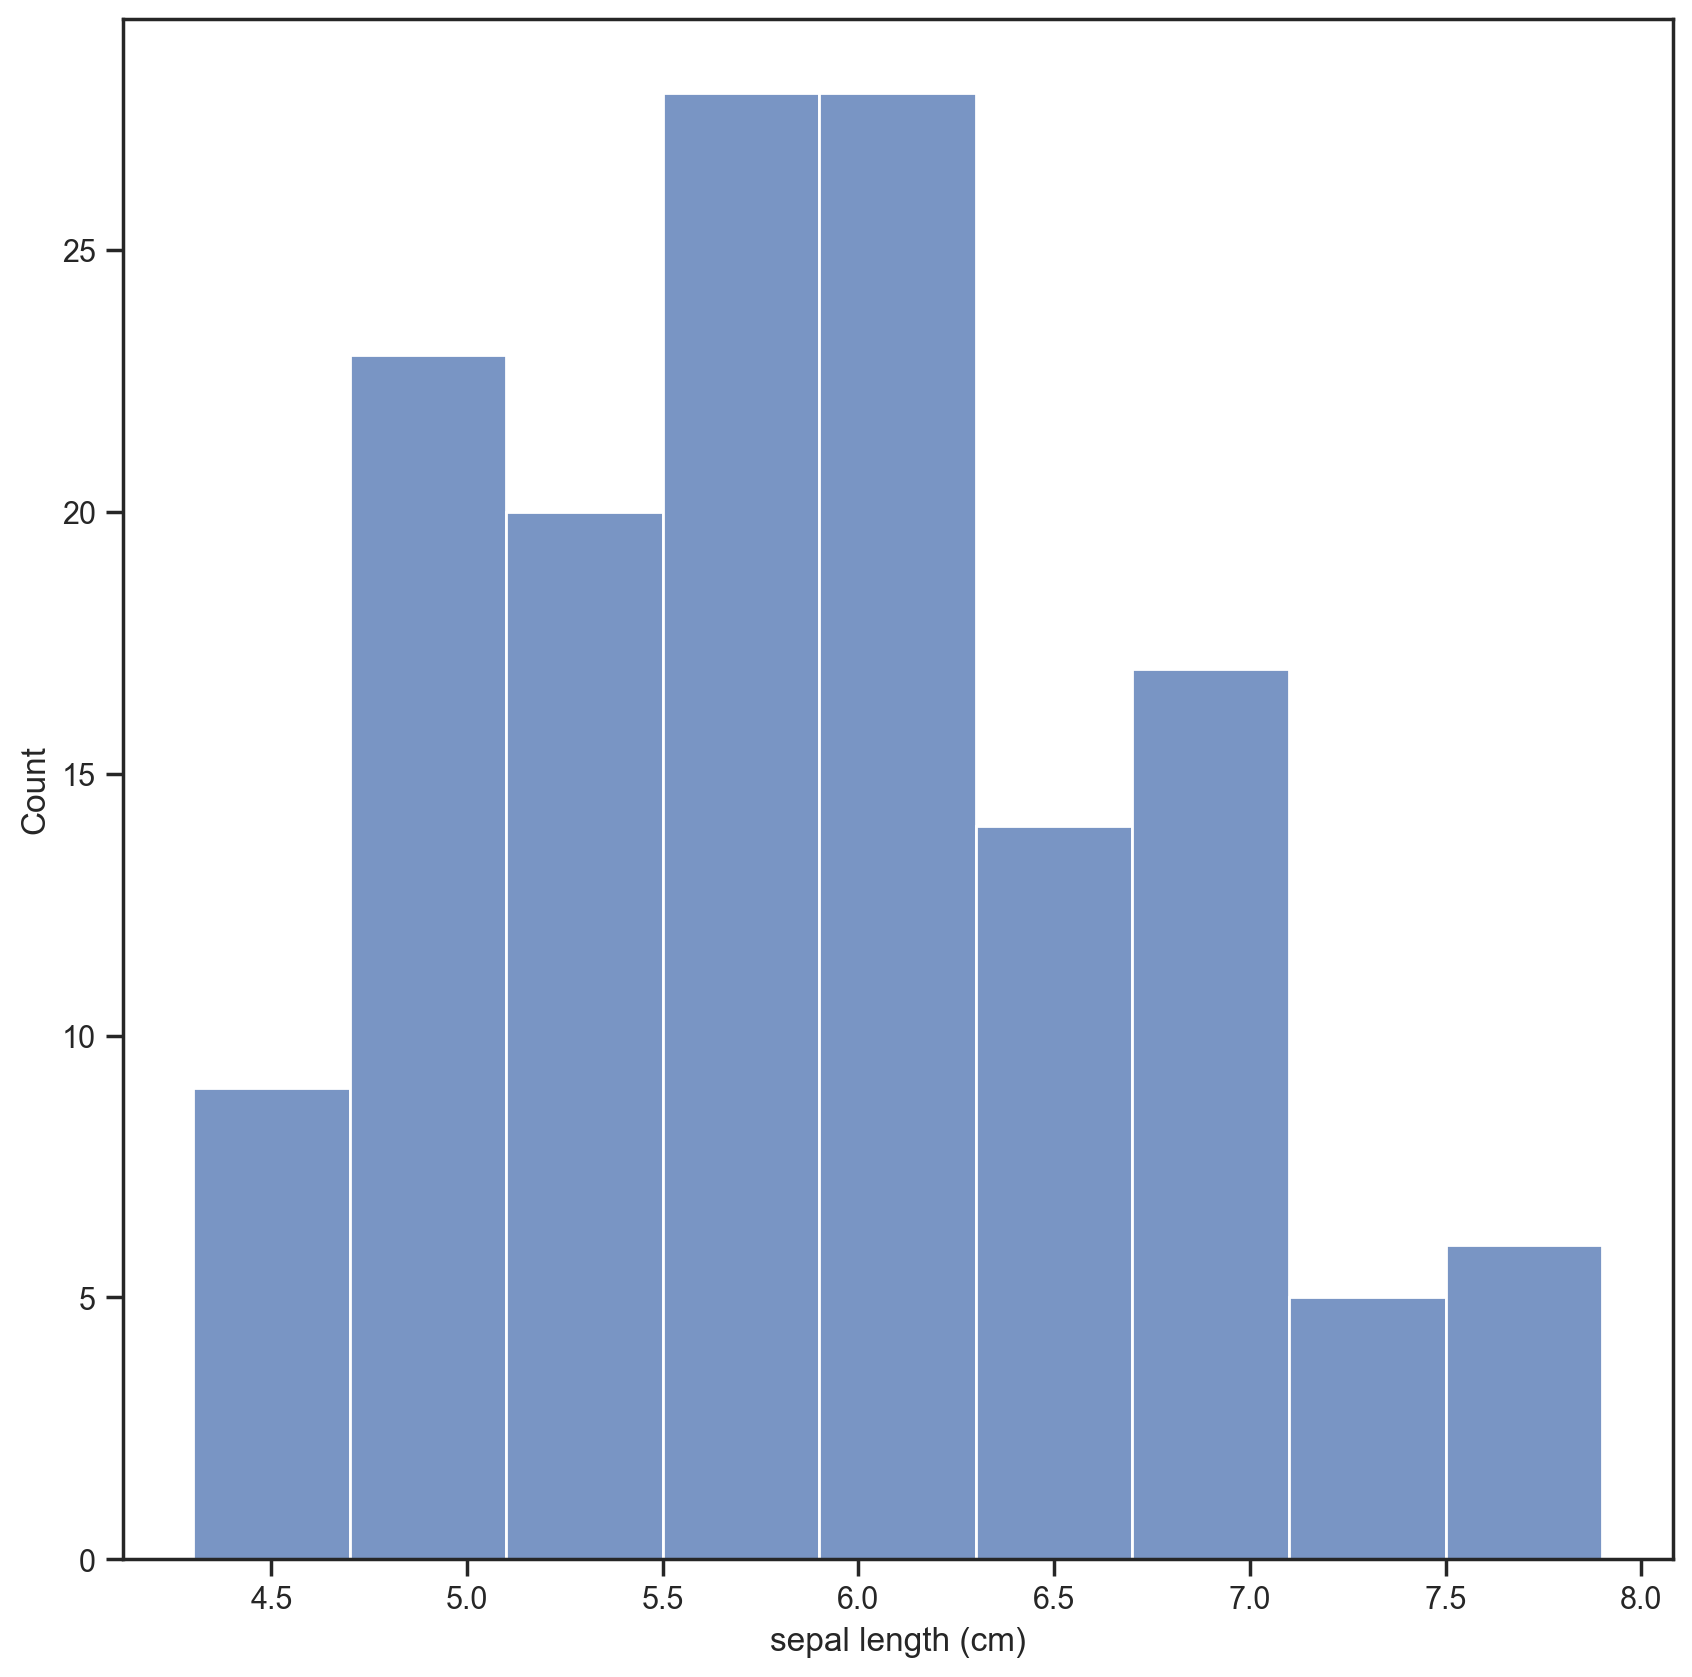

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.histplot(df['sepal length (cm)'])

<AxesSubplot: xlabel='petal length (cm)', ylabel='Count'>

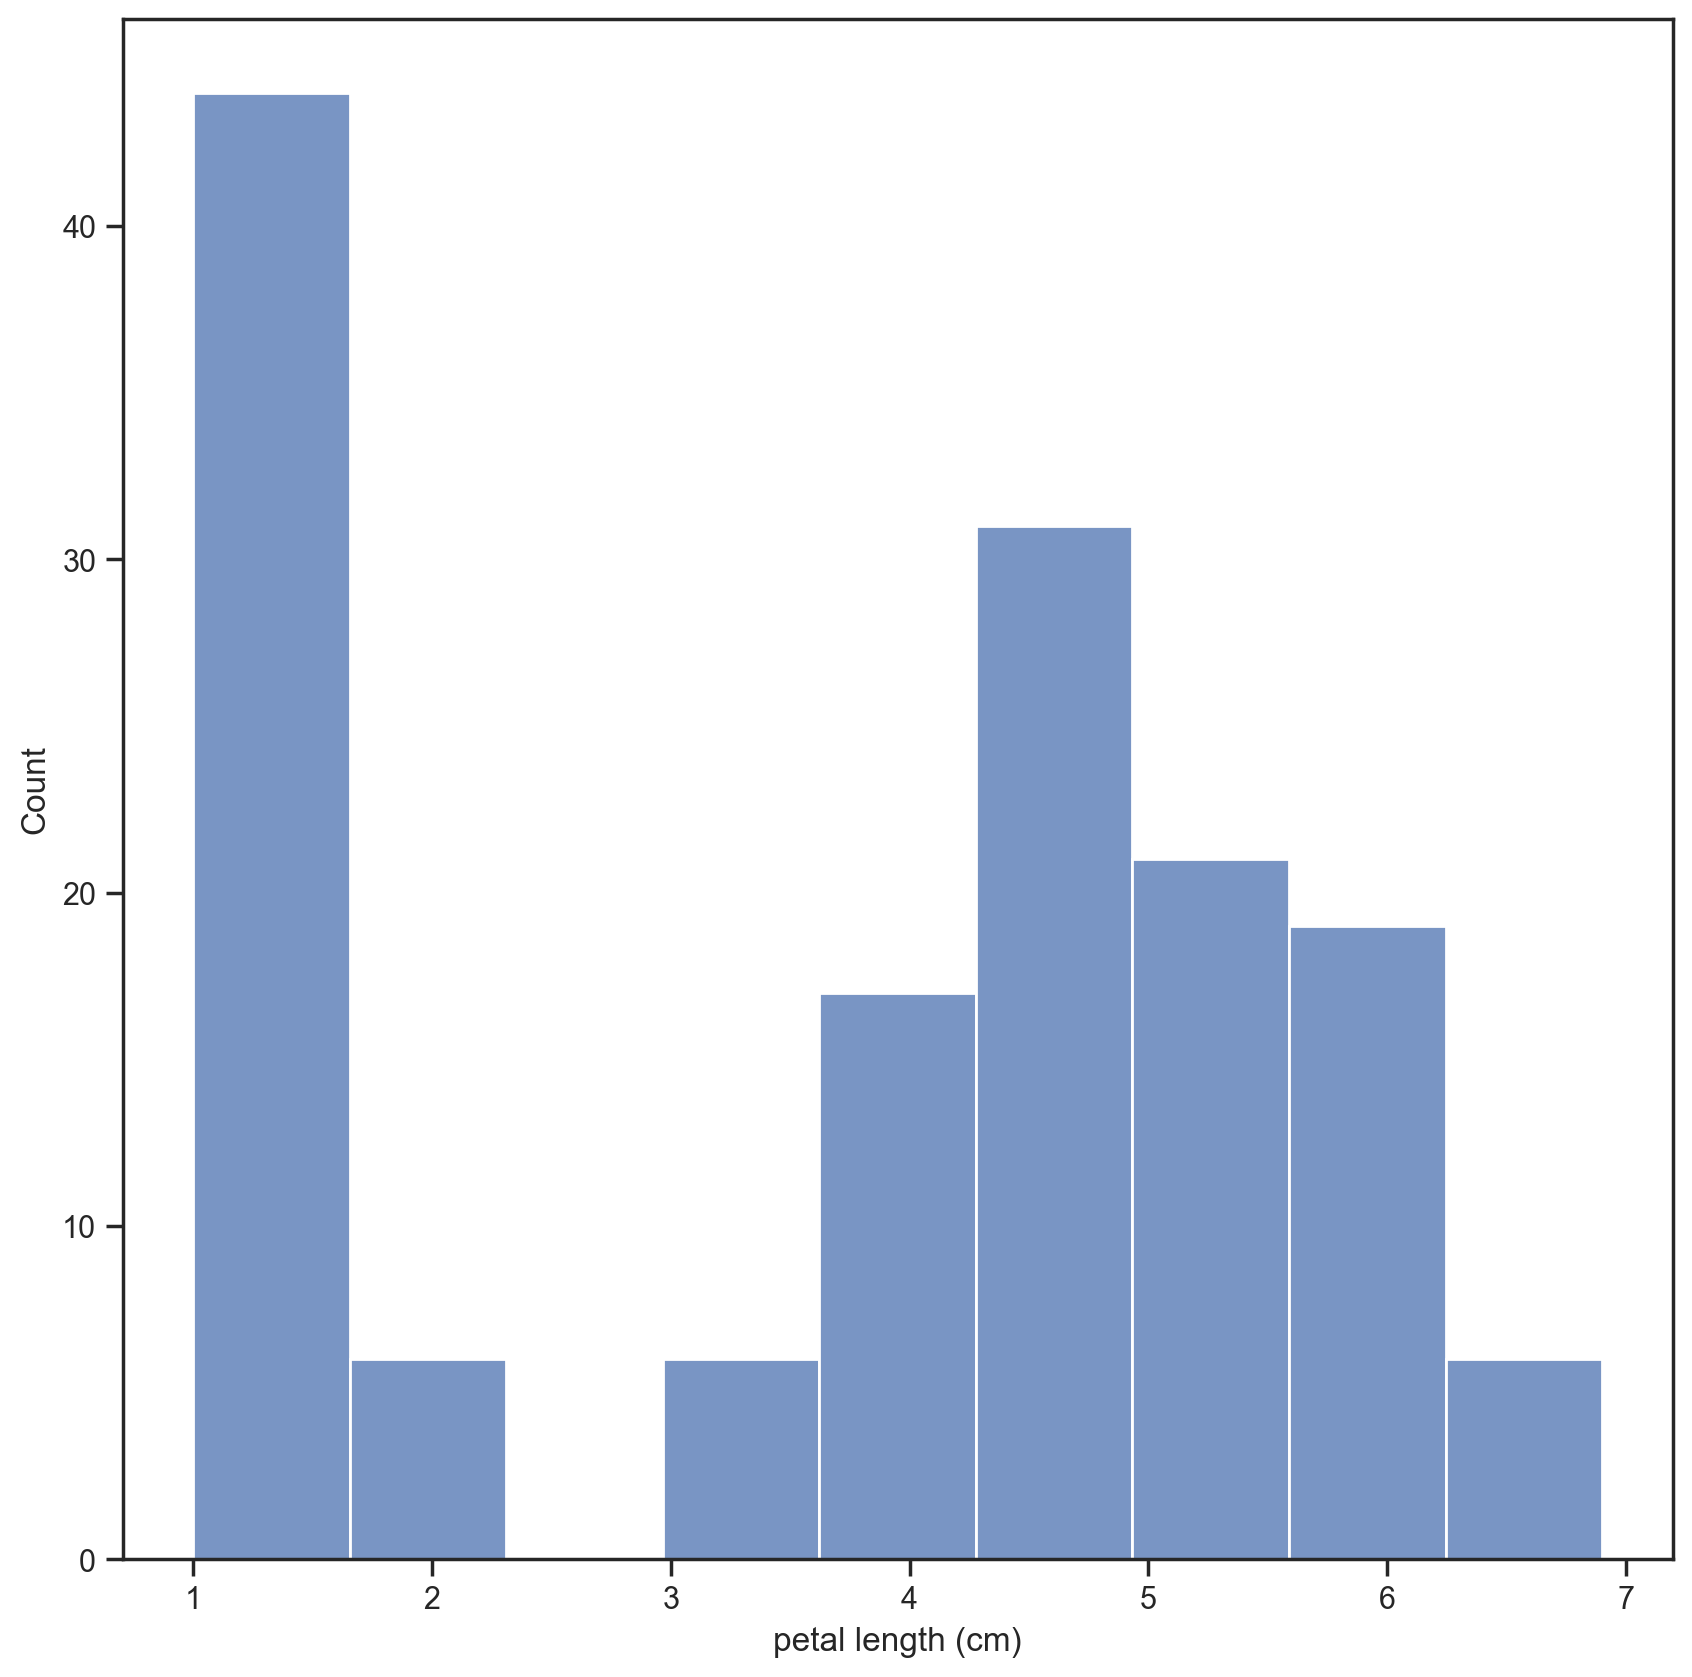

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.histplot(df['petal length (cm)'])

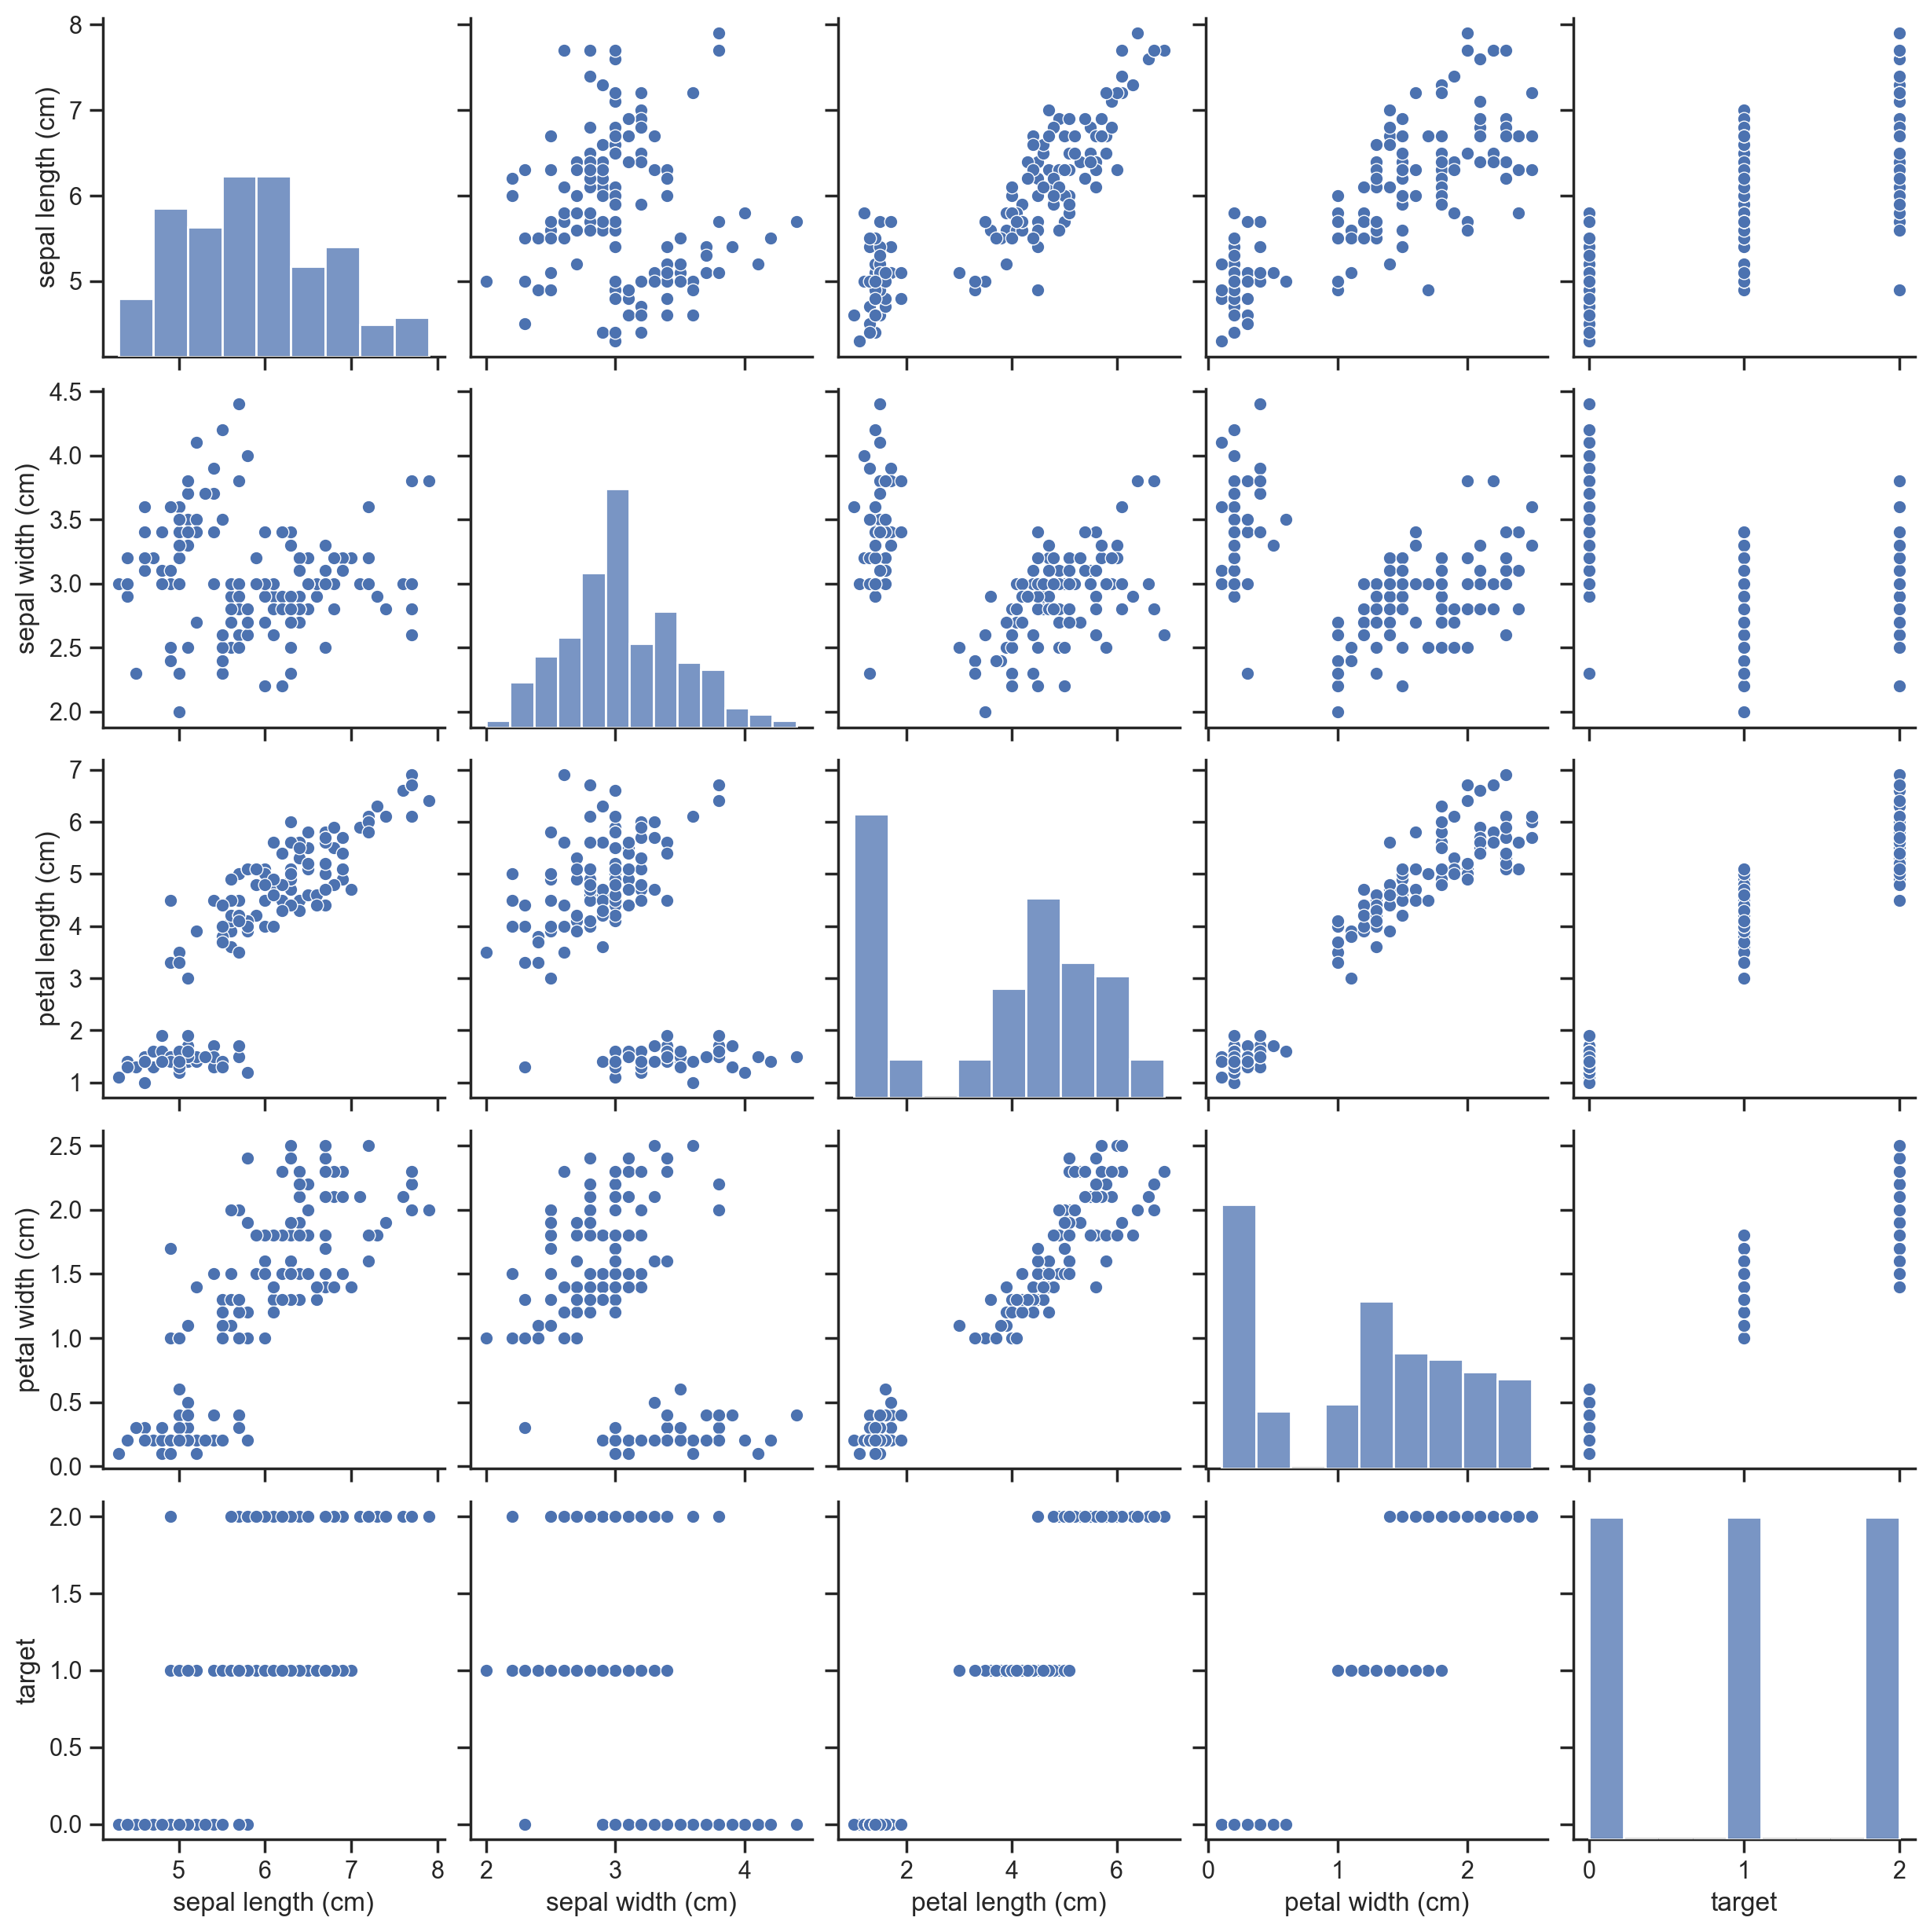

In [13]:
sns.pairplot(df)

<AxesSubplot: xlabel='target'>

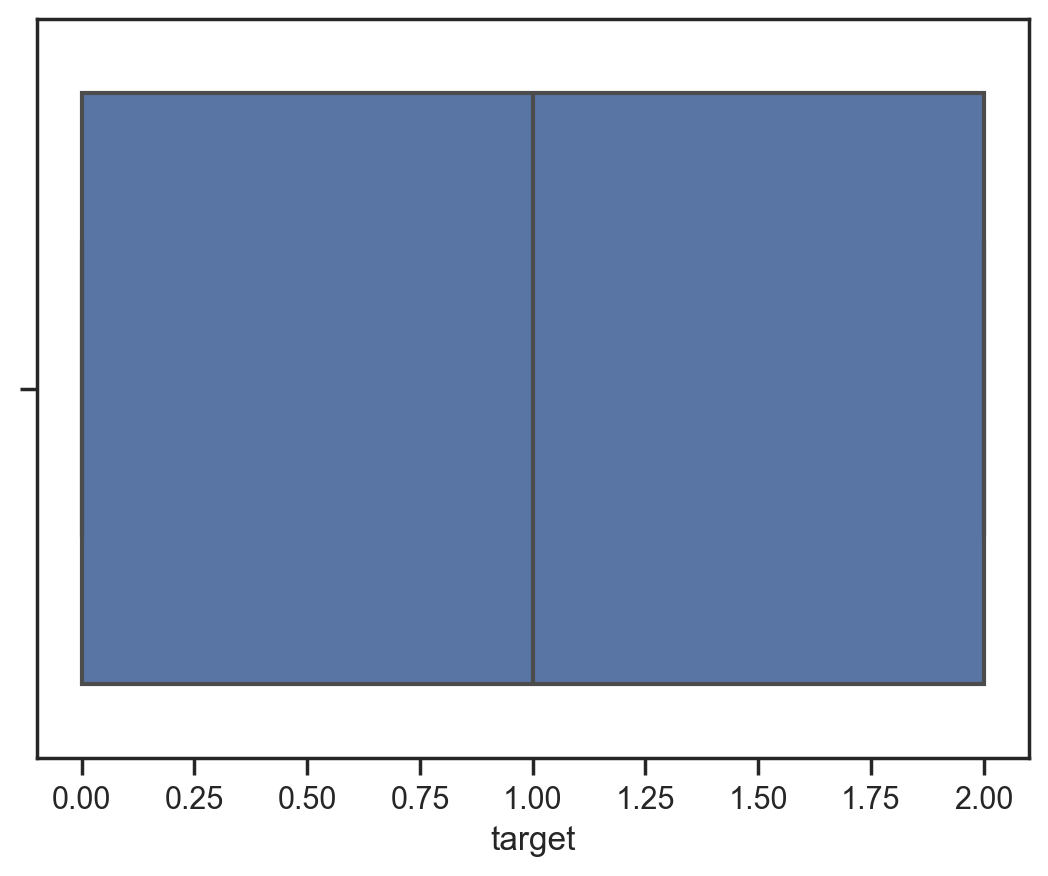

In [14]:
sns.boxplot(x=df['target'])

<AxesSubplot: xlabel='petal width (cm)'>

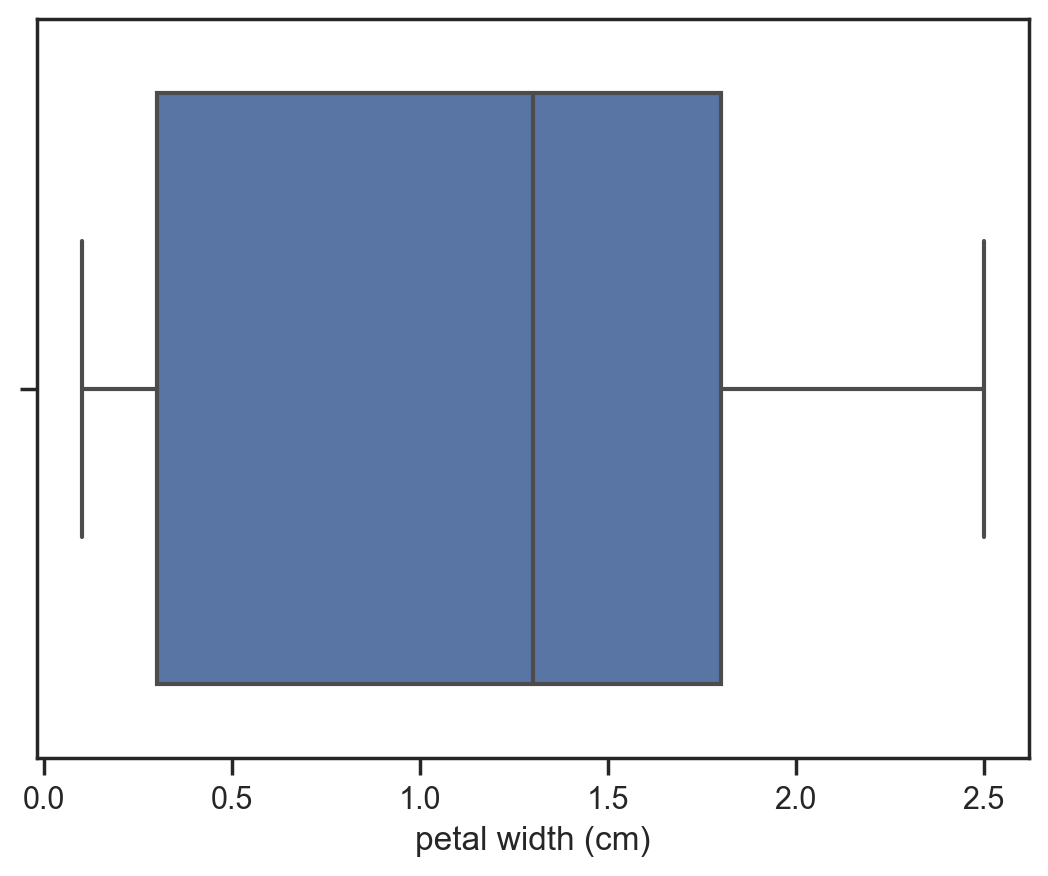

In [15]:
sns.boxplot(x=df['petal width (cm)'])

In [16]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot: >

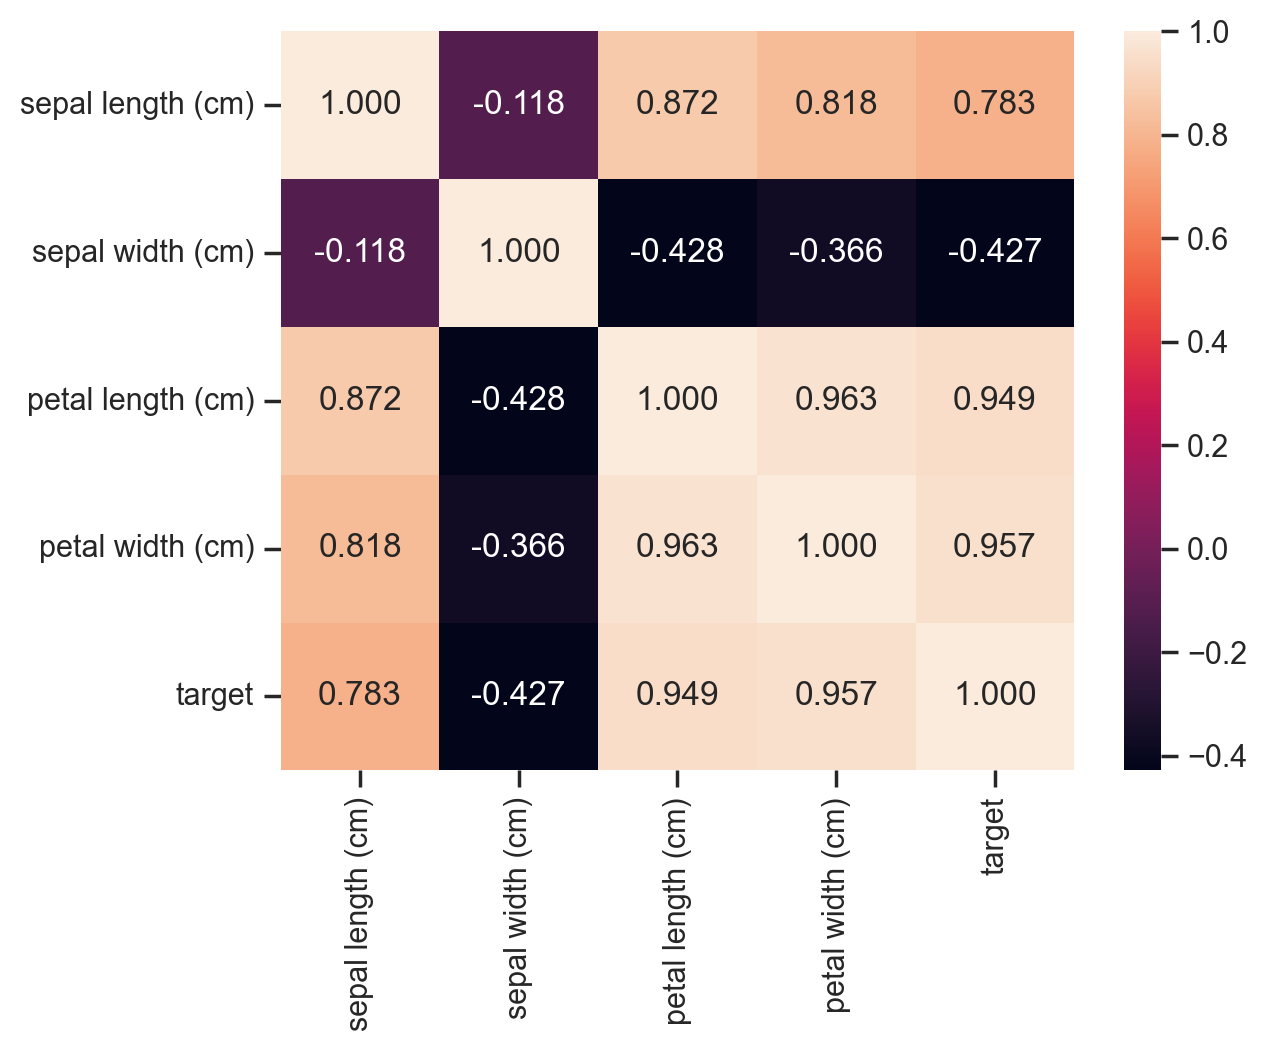

In [17]:
# Вывод значений в ячейках
sns.heatmap(df.corr(), annot=True, fmt='.3f')

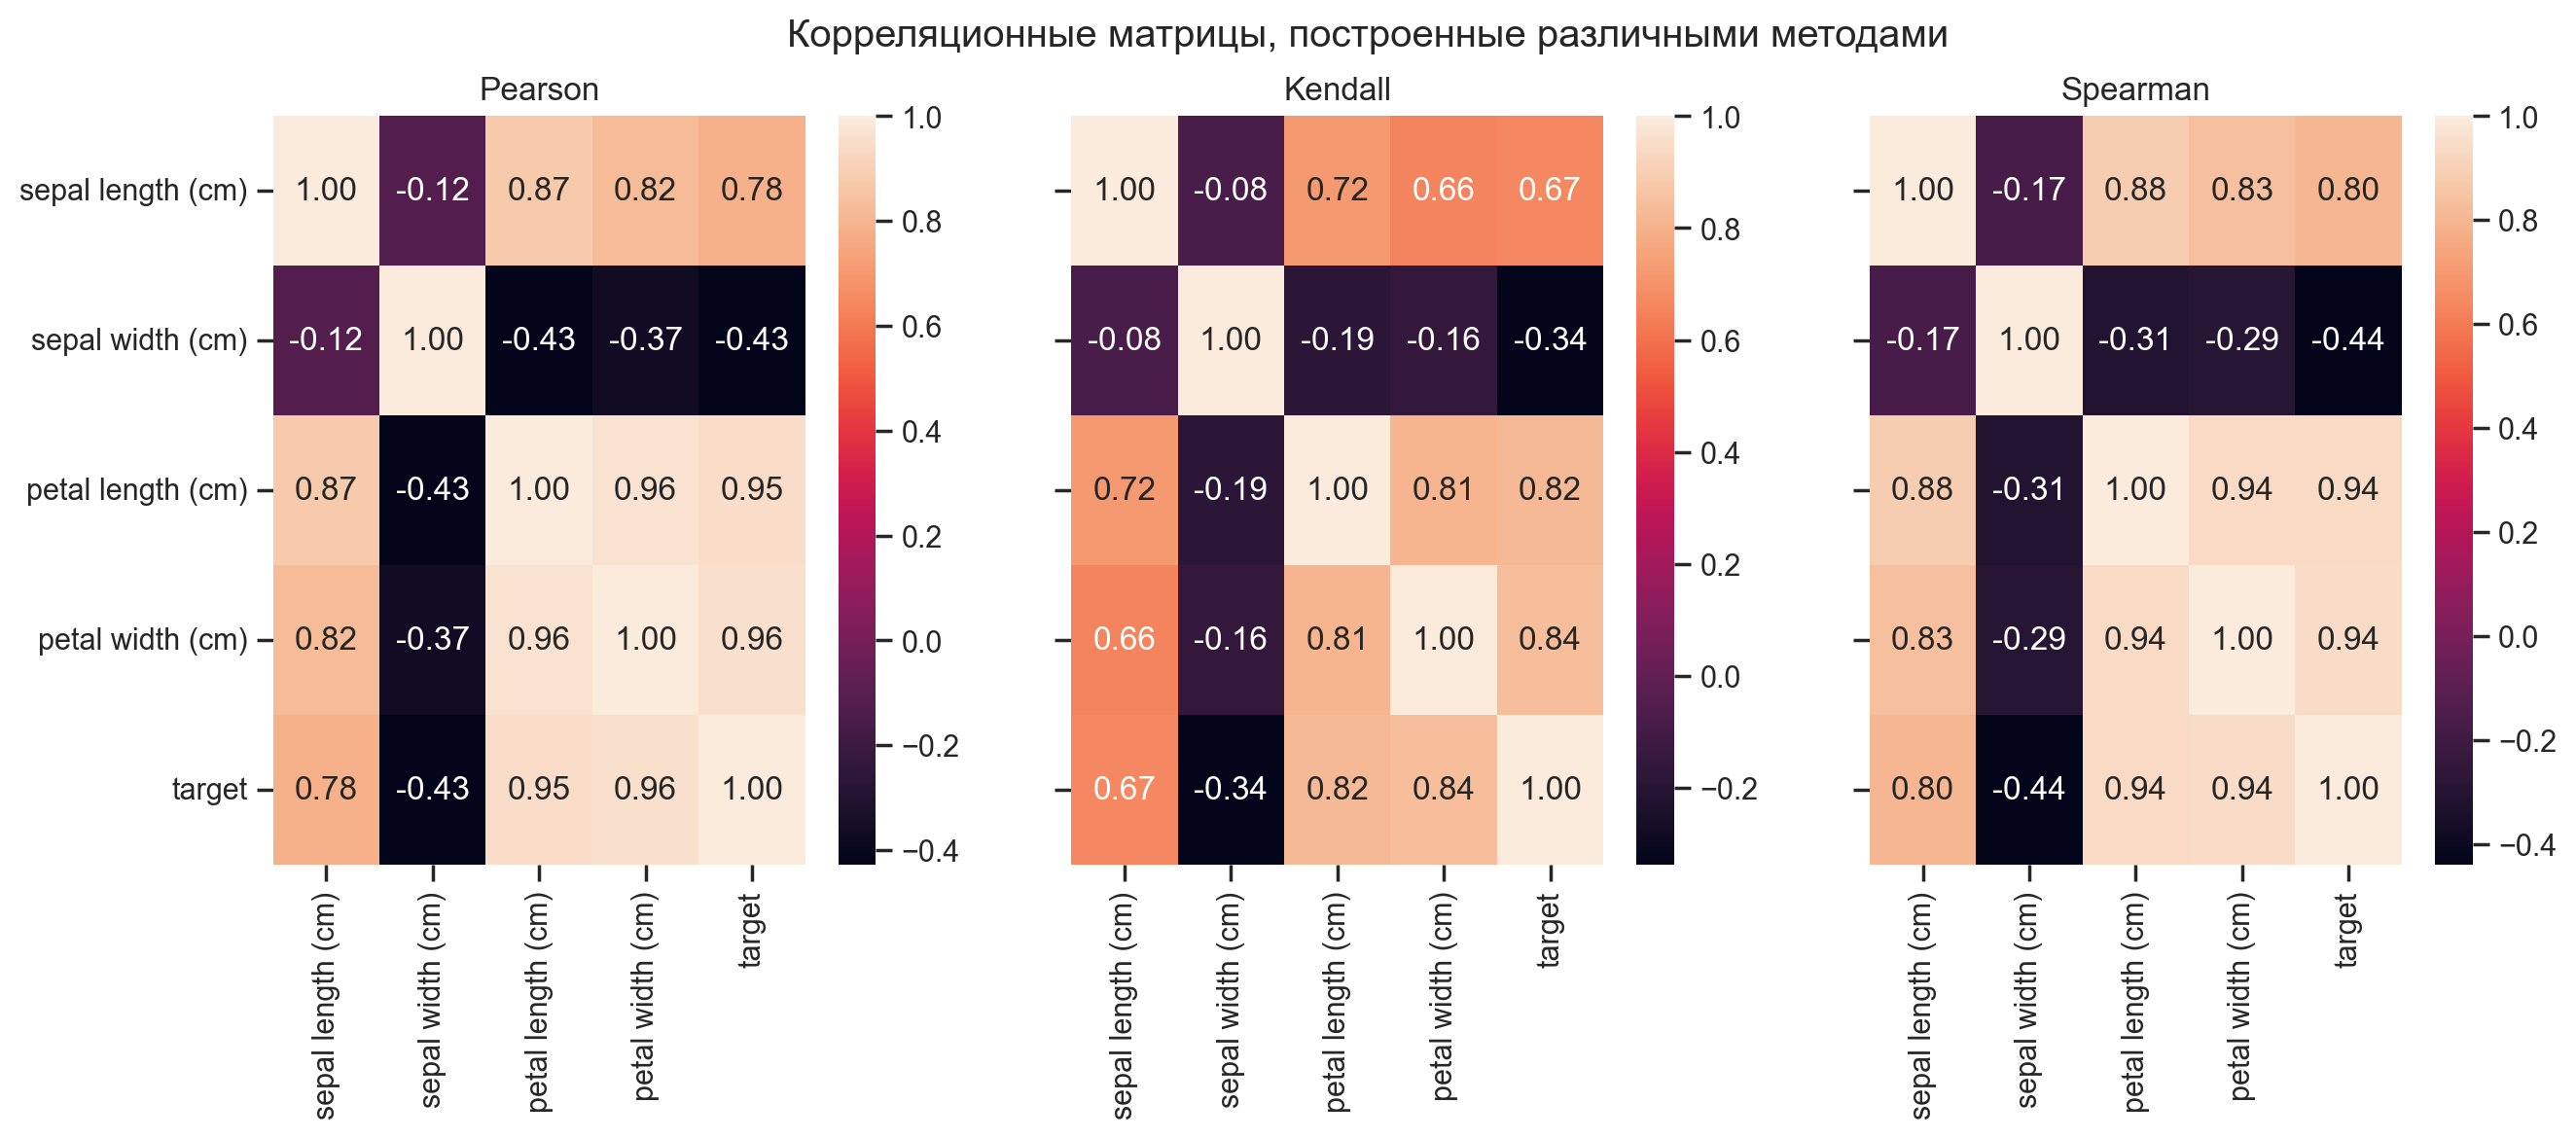

In [18]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(df.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(df.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(df.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')